This notebook creates and trains a Random Forest model which deals with sequence encoded data.

In [1]:
# Read data

import pandas as pd

# Possible critical alarm types
critical_alarm_types = [7,15,16,21,33,56,68,95,1000,1001]
df = pd.DataFrame()

for i in critical_alarm_types:
    # Replace the link according to the data you want to read (All, Unique Samples, Random Samples)
    type_df = pd.read_csv("../Data/Train/Unique Samples/Sequences/" + str(i) + ".csv")
    df = pd.concat([df, type_df], ignore_index=True)

X = df.drop(columns=['y']).values
y = df['y'].values

If you wish to perform an upsampling using SMOTE, run the following cell. If you do not wish to perform an upsampling, bypass the following cell and run the next one.

In [2]:
# Upsampling using SMOTE

from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [3]:
# Train-test-split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.33)

In [4]:
# Create model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = "log_loss", n_estimators = 50, max_features=7, min_samples_split=3, min_samples_leaf=3)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_features=7, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=50)

In [5]:
# Save model
import joblib

joblib.dump(model, 'RF_Unique_Sequences_SMOTE.joblib')

['RF_Unique_Sequences_SMOTE.joblib']

In [6]:
# Prediction on test data

y_pred = model.predict(X_test)

In [7]:
# Print classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.97      0.96      0.96     63476
          15       0.96      0.98      0.97     63586
          16       0.99      0.98      0.99     63409
          21       0.93      0.98      0.95     63324
          33       0.90      0.88      0.89     63293
          56       0.94      0.95      0.94     63631
          68       0.73      0.81      0.77     63582
          95       0.97      0.98      0.98     63682
        1000       0.96      0.94      0.95     63334
        1001       0.77      0.64      0.70     63273

    accuracy                           0.91    634590
   macro avg       0.91      0.91      0.91    634590
weighted avg       0.91      0.91      0.91    634590



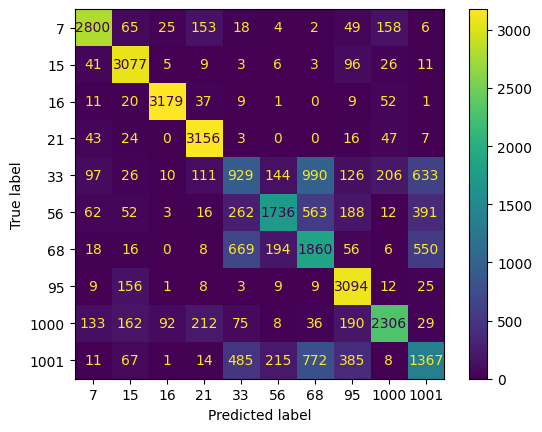

In [8]:
# Print confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()